Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataset and its info

In [4]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.shape

(768, 9)

In [9]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Replacing the 0 values (outliers)




In [37]:
# Using median
df["Glucose"] = df["Glucose"].replace(0, df["Glucose"].median())
df["BloodPressure"] = df["BloodPressure"].replace(0, df["BloodPressure"].median())

# Using mean
df["BMI"] = df["BMI"].replace(0, df["BMI"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].mean())
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].mean())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Correlation Matrix')

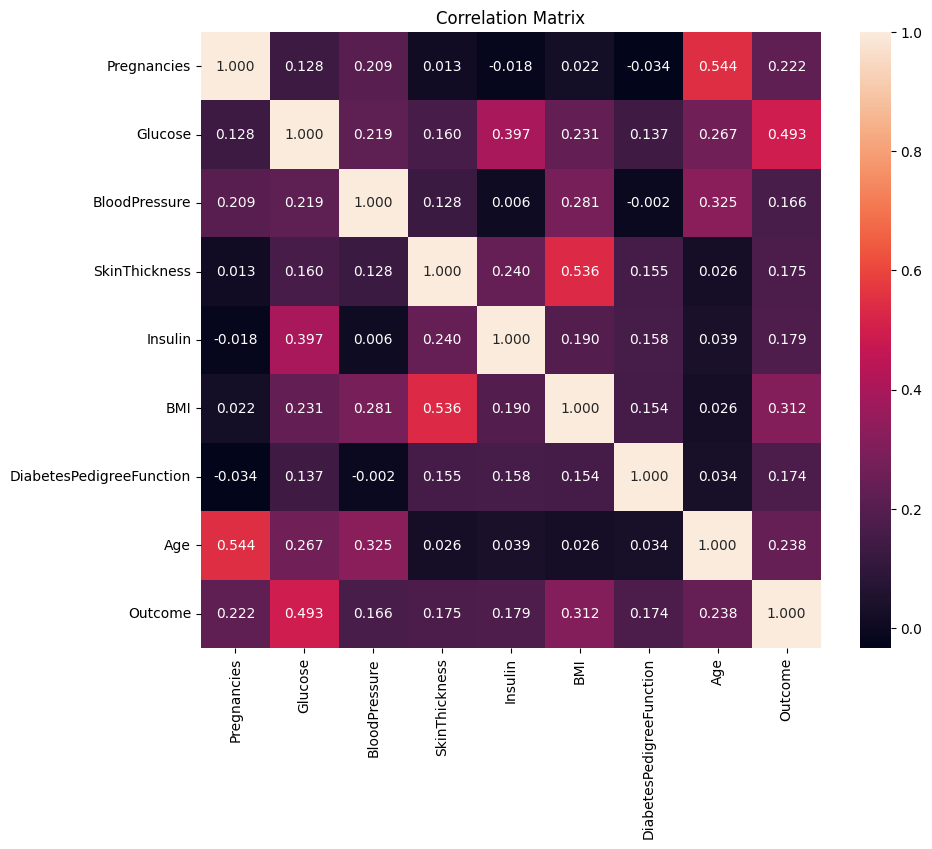

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".3f")
plt.title("Correlation Matrix")

Text(0.5, 1.0, 'Pregnancies vs Outcome')

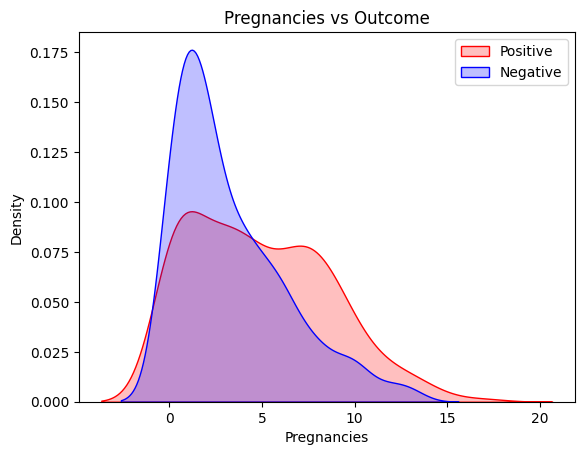

In [39]:
plt.figure()
#Probability Density Function graph

kde = sns.kdeplot(
    df[df["Outcome"] == 1]["Pregnancies"],
    color="red",
    fill=True
)
kde=sns.kdeplot(
    df[df["Outcome"] == 0]["Pregnancies"],
    color="blue",
    fill=True
)
kde=plt.xlabel("Pregnancies")
kde=plt.ylabel("Density")
kde=plt.legend(["Positive", "Negative"])
plt.title("Pregnancies vs Outcome")


<Axes: xlabel='Outcome', ylabel='Glucose'>

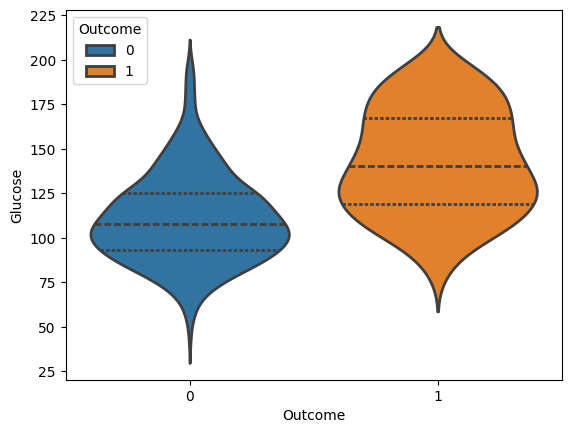

In [40]:
#violin plot
plt.figure()
sns.violinplot(data=df, x="Outcome", y="Glucose", linewidth=2, inner="quart", hue="Outcome")

Text(0.5, 1.0, 'Glucose vs Outcome')

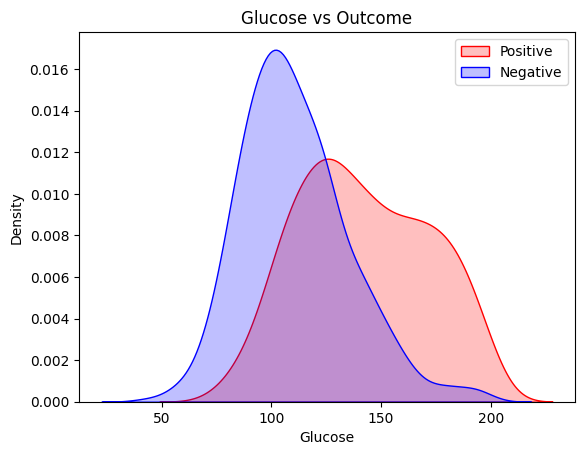

In [41]:
plt.figure()
#Probability Density Function graph

kde = sns.kdeplot(
    df[df["Outcome"] == 1]["Glucose"],
    color="red",
    fill=True
)
kde=sns.kdeplot(
    df[df["Outcome"] == 0]["Glucose"],
    color="blue",
    fill=True
)
kde=plt.xlabel("Glucose")
kde=plt.ylabel("Density")
kde=plt.legend(["Positive", "Negative"])
plt.title("Glucose vs Outcome")

Splitting the independent and dependent variables

In [44]:
x=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [45]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,79.799479,33.6,0.627,50
1,1,85,66,29.000000,79.799479,26.6,0.351,31
2,8,183,64,20.536458,79.799479,23.3,0.672,32
3,1,89,66,23.000000,94.000000,28.1,0.167,21
4,0,137,40,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63
764,2,122,70,27.000000,79.799479,36.8,0.340,27
765,5,121,72,23.000000,112.000000,26.2,0.245,30
766,1,126,60,20.536458,79.799479,30.1,0.349,47


In [46]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


Splitting the dataset into training and training dataset

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

Different Algorithms for training and testing the model for diabetes prediction

In [50]:
#KNN-K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

In [58]:
training_accuracy= []
test_accuracy= []

for n in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    training_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

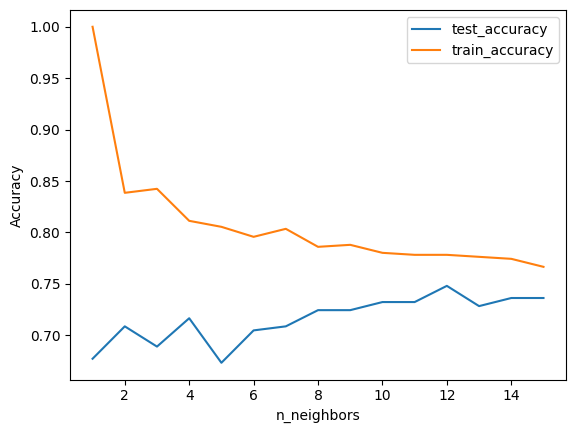

In [59]:
plt.plot(range(1, 16), test_accuracy, label="test_accuracy")
plt.plot(range(1, 16), training_accuracy, label="train_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [72]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)
print("Training Accuracy", knn.score(x_train, y_train))
print("Test Accuracy", knn.score(x_test, y_test))

Training Accuracy 0.7782101167315175
Test Accuracy 0.7480314960629921


In [75]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = knn.predict(x_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[147  21]
 [ 43  43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       168
           1       0.67      0.50      0.57        86

    accuracy                           0.75       254
   macro avg       0.72      0.69      0.70       254
weighted avg       0.74      0.75      0.74       254



In [76]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [93]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train), ": Training accuracy")
print(dt.score(x_test, y_test), ": Test accuracy")

1.0 : Training accuracy
0.6811023622047244 : Test accuracy


In [118]:
#The above case shows Overfiiting: Large difference in testing and training accuracy
dt1 = DecisionTreeClassifier(random_state=0, max_depth=3)
dt1.fit(x_train, y_train)
print(dt1.score(x_train, y_train), ": Training accuracy")
print(dt1.score(x_test, y_test), ": Test accuracy")


0.77431906614786 : Training accuracy
0.6929133858267716 : Test accuracy


In [119]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = dt1.predict(x_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[117  51]
 [ 27  59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75       168
           1       0.54      0.69      0.60        86

    accuracy                           0.69       254
   macro avg       0.67      0.69      0.68       254
weighted avg       0.72      0.69      0.70       254



In [123]:
# MPClassifier
from sklearn.neural_network import MLPClassifier

In [146]:
mlp = MLPClassifier(random_state=42, )
mlp.fit(x_train, y_train)
print(mlp.score(x_train, y_train), ": Training accuracy")
print(mlp.score(x_test, y_test), ": Test accuracy")

0.7509727626459144 : Training accuracy
0.6811023622047244 : Test accuracy


In [144]:
# Importing Standard Scaler
from sklearn.preprocessing import StandardScaler

# Scaling the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(x_train)
X_test_scaled = sc.transform(x_test)

In [155]:
# Model with scaled data
mlp1 = MLPClassifier(random_state=42)
mlp1.fit(X_train_scaled, y_train)

print(mlp1.score(X_train_scaled, y_train), ": Training accuracy")
print(mlp1.score(X_test_scaled, y_test), ": Test accuracy")

0.8346303501945526 : Training accuracy
0.7322834645669292 : Test accuracy


In [156]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = mlp1.predict(X_test_scaled)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[135  33]
 [ 35  51]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       168
           1       0.61      0.59      0.60        86

    accuracy                           0.73       254
   macro avg       0.70      0.70      0.70       254
weighted avg       0.73      0.73      0.73       254

